In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# File path to your new CSV file
file_path = 'C:/Users/bhard/OneDrive/Desktop/python projects/unemployment analysis.csv'

In [3]:
# Load the CSV file
df = pd.read_csv(file_path)

In [4]:
# Print the column names and first few rows to inspect
print("Column names:", df.columns.tolist())
print("First few rows of the data:")
print(df.head())

Column names: ['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
First few rows of the data:
                  Country Name Country Code   1991   1992   1993   1994  \
0  Africa Eastern and Southern          AFE   7.80   7.84   7.85   7.84   
1                  Afghanistan          AFG  10.65  10.82  10.72  10.73   
2   Africa Western and Central          AFW   4.42   4.53   4.55   4.54   
3                       Angola          AGO   4.21   4.21   4.23   4.16   
4                      Albania          ALB  10.31  30.01  25.26  20.84   

    1995   1996   1997   1998  ...   2012   2013   2014   2015   2016   2017  \
0   7.83   7.84   7.86   7.81  ...   6.56   6.45   6.41   6.49   6.61   6.71   
1  11.18  10.96  10.78  10.80  ...  11.34  11.19  11.14  11.13  11

In [6]:
# Melt the DataFrame to transform from wide to long format
df_long = pd.melt(df, id_vars=['Country Name', 'Country Code'], 
                   var_name='Year', value_name='Unemployment Rate (%)')

In [7]:
# Convert 'Year' column to datetime format
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y')

In [8]:
# Basic Data Exploration
print(df_long.head())
print(df_long.describe())

                  Country Name Country Code       Year  Unemployment Rate (%)
0  Africa Eastern and Southern          AFE 1991-01-01                   7.80
1                  Afghanistan          AFG 1991-01-01                  10.65
2   Africa Western and Central          AFW 1991-01-01                   4.42
3                       Angola          AGO 1991-01-01                   4.21
4                      Albania          ALB 1991-01-01                  10.31
                                Year  Unemployment Rate (%)
count                           7285            7285.000000
mean   2005-12-31 20:54:11.612903296               8.006119
min              1991-01-01 00:00:00               0.100000
25%              1998-01-01 00:00:00               4.100000
50%              2006-01-01 00:00:00               6.320000
75%              2014-01-01 00:00:00              10.480000
max              2021-01-01 00:00:00              38.800000
std                              NaN               5

In [18]:
# Plotting the Unemployment Rate over time for a specific country (e.g., Afghanistan)
country = 'Afghanistan'
df_country = df_long[df_long['Country Name'] == country].copy()
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

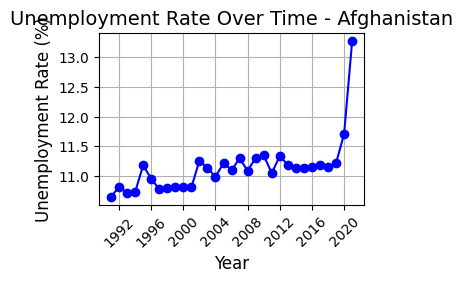

In [19]:
# Plot Unemployment Rate
plt.subplot(2, 2, 1)
plt.plot(df_country['Year'], df_country['Unemployment Rate (%)'], marker='o', linestyle='-', color='b')
plt.title(f'Unemployment Rate Over Time - {country}', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [20]:
# Analyze Trends - calculate the year-to-year change for the same country
df_country['Change'] = df_country['Unemployment Rate (%)'].diff()
print(f"\nChange in Unemployment Rate for {country}:")
print(df_country)


Change in Unemployment Rate for Afghanistan:
     Country Name Country Code       Year  Unemployment Rate (%)  Change
1     Afghanistan          AFG 1991-01-01                  10.65     NaN
236   Afghanistan          AFG 1992-01-01                  10.82    0.17
471   Afghanistan          AFG 1993-01-01                  10.72   -0.10
706   Afghanistan          AFG 1994-01-01                  10.73    0.01
941   Afghanistan          AFG 1995-01-01                  11.18    0.45
1176  Afghanistan          AFG 1996-01-01                  10.96   -0.22
1411  Afghanistan          AFG 1997-01-01                  10.78   -0.18
1646  Afghanistan          AFG 1998-01-01                  10.80    0.02
1881  Afghanistan          AFG 1999-01-01                  10.81    0.01
2116  Afghanistan          AFG 2000-01-01                  10.81    0.00
2351  Afghanistan          AFG 2001-01-01                  10.81    0.00
2586  Afghanistan          AFG 2002-01-01                  11.26    0.45
2821 

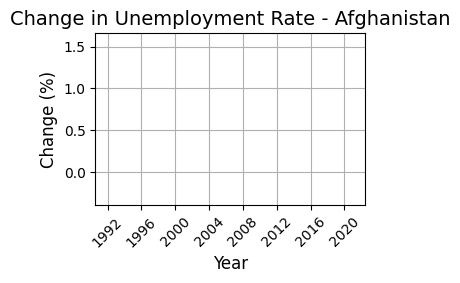

In [21]:
# Plot Change in Unemployment Rate
plt.subplot(2, 2, 2)
plt.bar(df_country['Year'], df_country['Change'], color='orange')
plt.title(f'Change in Unemployment Rate - {country}', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Change (%)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [22]:
# Moving Average to smooth the data (3-year moving average)
df_country = df_country.copy()  # Ensure we're working with a fresh copy
df_country.loc[:, 'Moving Average'] = df_country['Unemployment Rate (%)'].rolling(window=3).mean()

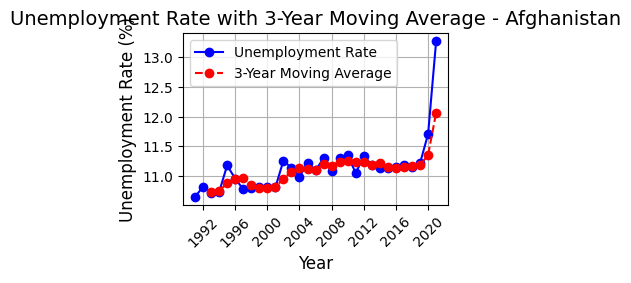

In [23]:
# Plot Unemployment Rate and Moving Average
plt.subplot(2, 2, 3)
plt.plot(df_country['Year'], df_country['Unemployment Rate (%)'], marker='o', linestyle='-', color='b', label='Unemployment Rate')
plt.plot(df_country['Year'], df_country['Moving Average'], marker='o', linestyle='--', color='r', label='3-Year Moving Average')
plt.title(f'Unemployment Rate with 3-Year Moving Average - {country}', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [26]:
# Pie Chart of Unemployment Rate distribution for a specific year (e.g., 2020)
year = 2020
df_year = df_long[df_long['Year'].dt.year == year].copy()
df_year = df_year.groupby('Country Name').agg({'Unemployment Rate (%)': 'mean'}).reset_index()

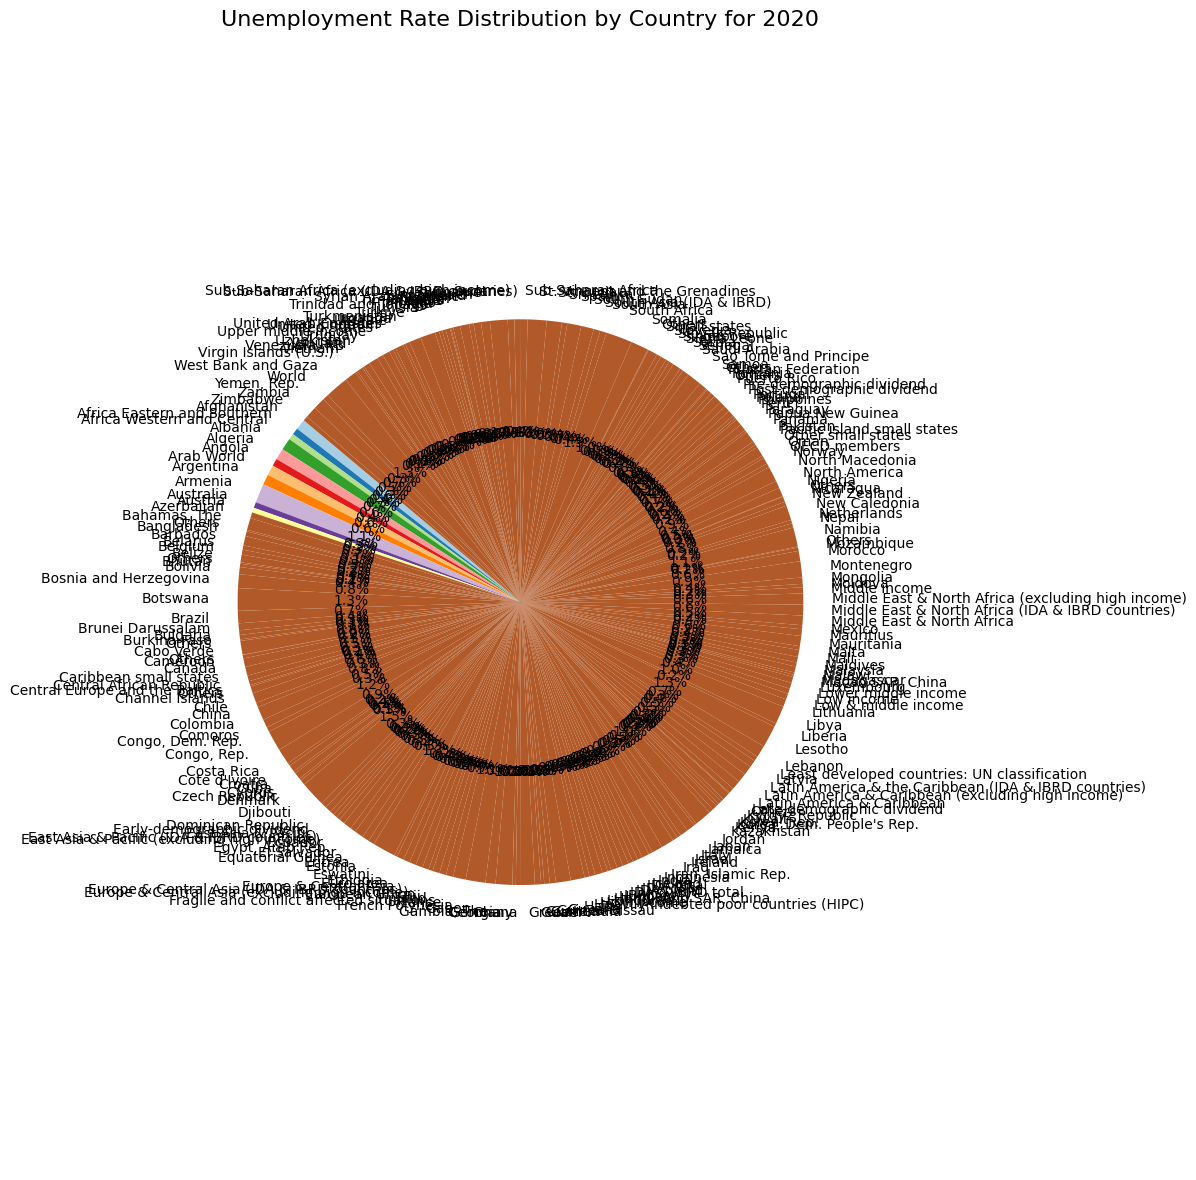

In [28]:
# Aggregating small slices into "Others"
threshold = 2  # Set the threshold for small slices
df_year.loc[df_year['Unemployment Rate (%)'] < threshold, 'Country Name'] = 'Others'

plt.figure(figsize=(12, 12))
plt.pie(df_year['Unemployment Rate (%)'], labels=df_year['Country Name'], autopct='%1.1f%%', 
        colors=plt.cm.Paired(range(len(df_year))), startangle=140)
plt.title(f'Unemployment Rate Distribution by Country for {year}', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [29]:
# Summary Pie Chart - Distribution of Average Unemployment Rate across countries
df_summary = df_long.groupby('Country Name').agg({'Unemployment Rate (%)': 'mean'}).reset_index()

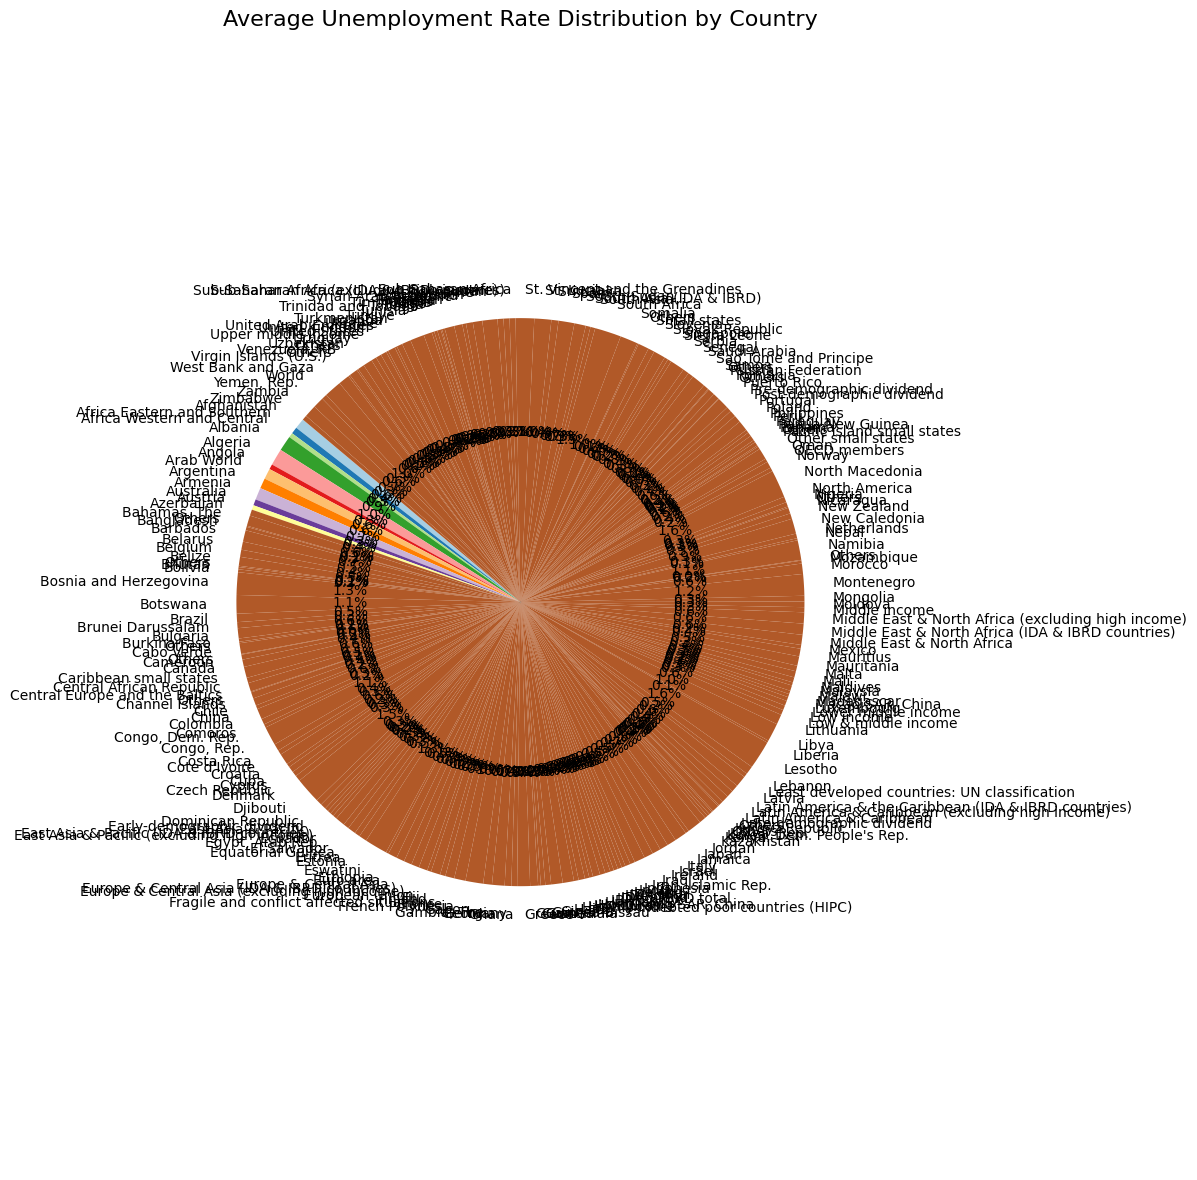

In [30]:
# Aggregating small slices into "Others"
df_summary.loc[df_summary['Unemployment Rate (%)'] < threshold, 'Country Name'] = 'Others'

plt.figure(figsize=(12, 12))
plt.pie(df_summary['Unemployment Rate (%)'], labels=df_summary['Country Name'], autopct='%1.1f%%', 
        colors=plt.cm.Paired(range(len(df_summary))), startangle=140)
plt.title('Average Unemployment Rate Distribution by Country', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()